https://www.endcoronavirus.org/countries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load CSV data directly from the URL with pandas, the options are needed to prevent
# reading of records with key "NA" (Namibia) as NaN
data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v2/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

# NOTE: We are only downloading the last day of data, but you can download all
# the data at once if you'd like by changing the URL to:
# https://storage.googleapis.com/covid19-open-data/v2/main.csv

# Print a small snippet of the dataset
print(f"The dataset currently contains {len(data)} records, here is a sample:")
data

The dataset currently contains 86385 records, here is a sample:


,date,key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index
0,2020-01-01,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,2020-01-01,AE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,2020-01-01,AF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,2020-01-01,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,2020-01-01,AO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86380,2020-12-02,CY,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86381,2020-12-02,IR,3.0,3.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,NaN,NaN,70.83
86382,2020-12-02,LT,2.0,2.0,2.0,4.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,62.96
86383,2020-12-02,NO,0.0,1.0,2.0,3.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,49.07


In [5]:
type(data)

pandas.core.frame.DataFrame

choose specific policies (closure and health)

In [6]:
data_health_testing_policy = data[['date','key', 'testing_policy']] 
s1 = (data_health_testing_policy['testing_policy'] - data_health_testing_policy['testing_policy'].min())/(data_health_testing_policy['testing_policy'].max() - data_health_testing_policy['testing_policy'].min())
data_health_testing_policy = data_health_testing_policy.drop(['testing_policy'],axis=1)
data_health_testing_policy.insert(2,'testing_policy',s1)
data_health_testing_policy

,date,key,testing_policy
0,2020-01-01,AD,0.000000
1,2020-01-01,AE,0.000000
2,2020-01-01,AF,0.000000
3,2020-01-01,AL,0.000000
4,2020-01-01,AO,0.000000
...,...,...,...
86380,2020-12-02,CY,NaN
86381,2020-12-02,IR,0.666667
86382,2020-12-02,LT,0.666667
86383,2020-12-02,NO,0.666667


In [7]:
data_health_contact_tracing = data[['date','key', 'contact_tracing']] 
s1 = (data_health_contact_tracing['contact_tracing'] - data_health_contact_tracing['contact_tracing'].min())/(data_health_contact_tracing['contact_tracing'].max() - data_health_contact_tracing['contact_tracing'].min())
data_health_contact_tracing = data_health_contact_tracing.drop(['contact_tracing'],axis=1)
data_health_contact_tracing.insert(2,'contact_tracing',s1)
data_health_contact_tracing

,date,key,contact_tracing
0,2020-01-01,AD,0.0
1,2020-01-01,AE,0.0
2,2020-01-01,AF,0.0
3,2020-01-01,AL,0.0
4,2020-01-01,AO,0.0
...,...,...,...
86380,2020-12-02,CY,NaN
86381,2020-12-02,IR,0.5
86382,2020-12-02,LT,1.0
86383,2020-12-02,NO,1.0


In [8]:
data_health_emergency_investment_in_healthcare = data[['date','key', 'emergency_investment_in_healthcare']] 
s1 = (data_health_emergency_investment_in_healthcare['emergency_investment_in_healthcare'] - data_health_emergency_investment_in_healthcare['emergency_investment_in_healthcare'].min())/(data_health_emergency_investment_in_healthcare['emergency_investment_in_healthcare'].max() - data_health_emergency_investment_in_healthcare['emergency_investment_in_healthcare'].min())
data_health_emergency_investment_in_healthcare = data_health_emergency_investment_in_healthcare.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_emergency_investment_in_healthcare.insert(2,'emergency_investment_in_healthcare',s1)
data_health_emergency_investment_in_healthcare

,date,key,emergency_investment_in_healthcare
0,2020-01-01,AD,0.0
1,2020-01-01,AE,0.0
2,2020-01-01,AF,0.0
3,2020-01-01,AL,0.0
4,2020-01-01,AO,0.0
...,...,...,...
86380,2020-12-02,CY,NaN
86381,2020-12-02,IR,NaN
86382,2020-12-02,LT,0.0
86383,2020-12-02,NO,0.0


In [9]:
data_health_investment_in_vaccines = data[['date','key', 'investment_in_vaccines']] 
s1 = (data_health_investment_in_vaccines['investment_in_vaccines'] - data_health_investment_in_vaccines['investment_in_vaccines'].min())/(data_health_investment_in_vaccines['investment_in_vaccines'].max() - data_health_investment_in_vaccines['investment_in_vaccines'].min())
data_health_investment_in_vaccines = data_health_investment_in_vaccines.drop(['investment_in_vaccines'],axis=1)
data_health_investment_in_vaccines.insert(2,'investment_in_vaccines',s1)
data_health_investment_in_vaccines

,date,key,investment_in_vaccines
0,2020-01-01,AD,0.0
1,2020-01-01,AE,0.0
2,2020-01-01,AF,0.0
3,2020-01-01,AL,0.0
4,2020-01-01,AO,0.0
...,...,...,...
86380,2020-12-02,CY,NaN
86381,2020-12-02,IR,NaN
86382,2020-12-02,LT,0.0
86383,2020-12-02,NO,0.0


pick: 
GREEN 
1. Australia              AU
2. New Zealand       NZ
3. Singapore           SG  
4. Thailand              TH
5. Somalia               SO

YELLOW
1. China                CN   
2. Egypt                EG
3. Israel                 IL
4. Kyrgyzstan       KG
5. Tajikistan          TJ

RED
1. USA                 US
2. Brazil               BR
3. Canada           CA
4. Philippines      PH
5. Russia            RU


Australia, New Zealand, Singapore, Thailand, Somalia

In [10]:
data_health_testing_policy_AU = data_health_testing_policy[data_health_testing_policy['key'] == "AU"]
AU_testing_policy_average = data_health_testing_policy_AU.mean(axis=0)
AU_testing_policy_average = AU_testing_policy_average.mean()
print(AU_testing_policy_average)
data_health_contact_tracing_AU = data_health_contact_tracing[data_health_contact_tracing['key'] == "AU"]
AU_contact_tracing_average = data_health_contact_tracing_AU.mean(axis=0)
AU_contact_tracing_average = AU_contact_tracing_average.mean()
print(AU_contact_tracing_average)
data_health_emergency_investment_in_healthcare_AU = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "AU"]
AU_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_AU.mean(axis=0)
AU_emergency_investment_in_healthcare_average = AU_emergency_investment_in_healthcare_average.mean()
print(AU_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_AU = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "AU"]
AU_investment_in_vaccines_average = data_health_investment_in_vaccines_AU.mean(axis=0)
AU_investment_in_vaccines_average = AU_investment_in_vaccines_average.mean()
print(AU_investment_in_vaccines_average)

0.7174129353233832
0.9283582089552239
2.2910983079651246e-05
0.0010561259347230281


In [11]:
data_health_testing_policy_NZ = data_health_testing_policy[data_health_testing_policy['key'] == "NZ"]
NZ_testing_policy_average = data_health_testing_policy_NZ.mean(axis=0)
NZ_testing_policy_average = NZ_testing_policy_average.mean()
print(NZ_testing_policy_average)
data_health_contact_tracing_NZ = data_health_contact_tracing[data_health_contact_tracing['key'] == "NZ"]
NZ_contact_tracing_average = data_health_contact_tracing_NZ.mean(axis=0)
NZ_contact_tracing_average = NZ_contact_tracing_average.mean()
print(NZ_contact_tracing_average)
data_health_emergency_investment_in_healthcare_NZ = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "NZ"]
NZ_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_NZ.mean(axis=0)
NZ_emergency_investment_in_healthcare_average = NZ_emergency_investment_in_healthcare_average.mean()
print(NZ_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_NZ = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "NZ"]
NZ_investment_in_vaccines_average = data_health_investment_in_vaccines_NZ.mean(axis=0)
NZ_investment_in_vaccines_average = NZ_investment_in_vaccines_average.mean()
print(NZ_investment_in_vaccines_average)

0.5184079601990049
0.826865671641791
3.660264789911827e-06
9.088050764441768e-06


In [12]:
data_health_testing_policy_SG = data_health_testing_policy[data_health_testing_policy['key'] == "SG"]
SG_testing_policy_average = data_health_testing_policy_SG.mean(axis=0)
SG_testing_policy_average = SG_testing_policy_average.mean()
print(SG_testing_policy_average)
data_health_contact_tracing_SG = data_health_contact_tracing[data_health_contact_tracing['key'] == "SG"]
SG_contact_tracing_average = data_health_contact_tracing_SG.mean(axis=0)
SG_contact_tracing_average = SG_contact_tracing_average.mean()
print(SG_contact_tracing_average)
data_health_emergency_investment_in_healthcare_SG = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "SG"]
SG_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_SG.mean(axis=0)
SG_emergency_investment_in_healthcare_average = SG_emergency_investment_in_healthcare_average.mean()
print(SG_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_SG = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "SG"]
SG_investment_in_vaccines_average = data_health_investment_in_vaccines_SG.mean(axis=0)
SG_investment_in_vaccines_average = SG_investment_in_vaccines_average.mean()
print(SG_investment_in_vaccines_average)

0.6432926829268293
0.9420731707317073
7.043387265555823e-08
0.0


In [13]:
data_health_testing_policy_TH = data_health_testing_policy[data_health_testing_policy['key'] == "TH"]
TH_testing_policy_average = data_health_testing_policy_TH.mean(axis=0)
TH_testing_policy_average = TH_testing_policy_average.mean()
print(TH_testing_policy_average)
data_health_contact_tracing_TH = data_health_contact_tracing[data_health_contact_tracing['key'] == "TH"]
TH_contact_tracing_average = data_health_contact_tracing_TH.mean(axis=0)
TH_contact_tracing_average = TH_contact_tracing_average.mean()
print(TH_contact_tracing_average)
data_health_emergency_investment_in_healthcare_TH = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "TH"]
TH_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_TH.mean(axis=0)
TH_emergency_investment_in_healthcare_average = TH_emergency_investment_in_healthcare_average.mean()
print(TH_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_TH = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "TH"]
TH_investment_in_vaccines_average = data_health_investment_in_vaccines_TH.mean(axis=0)
TH_investment_in_vaccines_average = TH_investment_in_vaccines_average.mean()
print(TH_investment_in_vaccines_average)

0.48502994011976047
0.6796407185628742
0.00023906120977105195
0.0006017835374225664


In [14]:
data_health_testing_policy_SO = data_health_testing_policy[data_health_testing_policy['key'] == "SO"]
SO_testing_policy_average = data_health_testing_policy_SO.mean(axis=0)
SO_testing_policy_average = SO_testing_policy_average.mean()
print(SO_testing_policy_average)
data_health_contact_tracing_SO = data_health_contact_tracing[data_health_contact_tracing['key'] == "SO"]
SO_contact_tracing_average = data_health_contact_tracing_SO.mean(axis=0)
SO_contact_tracing_average = SO_contact_tracing_average.mean()
print(SO_contact_tracing_average)
data_health_emergency_investment_in_healthcare_SO = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "SO"]
SO_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_SO.mean(axis=0)
SO_emergency_investment_in_healthcare_average = SO_emergency_investment_in_healthcare_average.mean()
print(SO_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_SO = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "SO"]
SO_investment_in_vaccines_average = data_health_investment_in_vaccines_SO.mean(axis=0)
SO_investment_in_vaccines_average = SO_investment_in_vaccines_average.mean()
print(SO_investment_in_vaccines_average)

0.3003003003003003
0.15015015015015015
0.0
0.0


China, Egypt, Israel, Kyrgyzstan, Tajikistan

In [15]:
data_health_testing_policy_CN = data_health_testing_policy[data_health_testing_policy['key'] == "CN"]
CN_testing_policy_average = data_health_testing_policy_CN.mean(axis=0)
CN_testing_policy_average = CN_testing_policy_average.mean()
print(CN_testing_policy_average)
data_health_contact_tracing_CN = data_health_contact_tracing[data_health_contact_tracing['key'] == "CN"]
CN_contact_tracing_average = data_health_contact_tracing_CN.mean(axis=0)
CN_contact_tracing_average = CN_contact_tracing_average.mean()
print(CN_contact_tracing_average)
data_health_emergency_investment_in_healthcare_CN = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "CN"]
CN_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_CN.mean(axis=0)
CN_emergency_investment_in_healthcare_average = CN_emergency_investment_in_healthcare_average.mean()
print(CN_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_CN = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "CN"]
CN_investment_in_vaccines_average = data_health_investment_in_vaccines_CN.mean(axis=0)
CN_investment_in_vaccines_average = CN_investment_in_vaccines_average.mean()
print(CN_investment_in_vaccines_average)

0.8638638638638637
0.993993993993994
0.00025776589950098614
0.0


In [16]:
data_health_testing_policy_EG = data_health_testing_policy[data_health_testing_policy['key'] == "EG"]
EG_testing_policy_average = data_health_testing_policy_EG.mean(axis=0)
EG_testing_policy_average = EG_testing_policy_average.mean()
print(EG_testing_policy_average)
data_health_contact_tracing_EG = data_health_contact_tracing[data_health_contact_tracing['key'] == "EG"]
EG_contact_tracing_average = data_health_contact_tracing_EG.mean(axis=0)
EG_contact_tracing_average = EG_contact_tracing_average.mean()
print(EG_contact_tracing_average)
data_health_emergency_investment_in_healthcare_EG = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "EG"]
EG_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_EG.mean(axis=0)
EG_emergency_investment_in_healthcare_average = EG_emergency_investment_in_healthcare_average.mean()
print(EG_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_EG = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "EG"]
EG_investment_in_vaccines_average = data_health_investment_in_vaccines_EG.mean(axis=0)
EG_investment_in_vaccines_average = EG_investment_in_vaccines_average.mean()
print(EG_investment_in_vaccines_average)

0.4780439121756487
0.8682634730538922
7.348916029327484e-06
0.0


In [17]:
data_health_testing_policy_IL = data_health_testing_policy[data_health_testing_policy['key'] == "IL"]
IL_testing_policy_average = data_health_testing_policy_IL.mean(axis=0)
IL_testing_policy_average = IL_testing_policy_average.mean()
print(IL_testing_policy_average)
data_health_contact_tracing_IL = data_health_contact_tracing[data_health_contact_tracing['key'] == "IL"]
IL_contact_tracing_average = data_health_contact_tracing_IL.mean(axis=0)
IL_contact_tracing_average = IL_contact_tracing_average.mean()
print(IL_contact_tracing_average)
data_health_emergency_investment_in_healthcare_IL = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "IL"]
IL_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_IL.mean(axis=0)
IL_emergency_investment_in_healthcare_average = IL_emergency_investment_in_healthcare_average.mean()
print(IL_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_IL = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "IL"]
IL_investment_in_vaccines_average = data_health_investment_in_vaccines_IL.mean(axis=0)
IL_investment_in_vaccines_average = IL_investment_in_vaccines_average.mean()
print(IL_investment_in_vaccines_average)

0.49850746268656715
0.6059701492537314
5.0508669523668784e-05
2.277569019277281e-05


In [18]:
data_health_testing_policy_KG = data_health_testing_policy[data_health_testing_policy['key'] == "KG"]
KG_testing_policy_average = data_health_testing_policy_KG.mean(axis=0)
KG_testing_policy_average = KG_testing_policy_average.mean()
print(KG_testing_policy_average)
data_health_contact_tracing_KG = data_health_contact_tracing[data_health_contact_tracing['key'] == "KG"]
KG_contact_tracing_average = data_health_contact_tracing_KG.mean(axis=0)
KG_contact_tracing_average = KG_contact_tracing_average.mean()
print(KG_contact_tracing_average)
data_health_emergency_investment_in_healthcare_KG = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "KG"]
KG_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_KG.mean(axis=0)
KG_emergency_investment_in_healthcare_average = KG_emergency_investment_in_healthcare_average.mean()
print(KG_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_KG = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "KG"]
KG_investment_in_vaccines_average = data_health_investment_in_vaccines_KG.mean(axis=0)
KG_investment_in_vaccines_average = KG_investment_in_vaccines_average.mean()
print(KG_investment_in_vaccines_average)

0.3663663663663664
0.47897897897897895
2.621437526635546e-07
0.0


In [19]:
data_health_testing_policy_TJ = data_health_testing_policy[data_health_testing_policy['key'] == "TJ"]
TJ_testing_policy_average = data_health_testing_policy_TJ.mean(axis=0)
TJ_testing_policy_average = TJ_testing_policy_average.mean()
print(TJ_testing_policy_average)
data_health_contact_tracing_TJ = data_health_contact_tracing[data_health_contact_tracing['key'] == "TJ"]
TJ_contact_tracing_average = data_health_contact_tracing_TJ.mean(axis=0)
TJ_contact_tracing_average = TJ_contact_tracing_average.mean()
print(TJ_contact_tracing_average)
data_health_emergency_investment_in_healthcare_TJ = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "TJ"]
TJ_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_TJ.mean(axis=0)
TJ_emergency_investment_in_healthcare_average = TJ_emergency_investment_in_healthcare_average.mean()
print(TJ_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_TJ = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "TJ"]
TJ_investment_in_vaccines_average = data_health_investment_in_vaccines_TJ.mean(axis=0)
TJ_investment_in_vaccines_average = TJ_investment_in_vaccines_average.mean()
print(TJ_investment_in_vaccines_average)

0.29929929929929927
0.45345345345345345
3.6273897660036272e-09
0.0


United States,Brazil,Canada,Philippines,Russia          

In [20]:
data_health_testing_policy_US = data_health_testing_policy[data_health_testing_policy['key'] == "US"]
US_testing_policy_average = data_health_testing_policy_US.mean(axis=0)
US_testing_policy_average = US_testing_policy_average.mean()
print(US_testing_policy_average)
data_health_contact_tracing_US = data_health_contact_tracing[data_health_contact_tracing['key'] == "US"]
US_contact_tracing_average = data_health_contact_tracing_US.mean(axis=0)
US_contact_tracing_average = US_contact_tracing_average.mean()
print(US_contact_tracing_average)
data_health_emergency_investment_in_healthcare_US = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "US"]
US_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_US.mean(axis=0)
US_emergency_investment_in_healthcare_average = US_emergency_investment_in_healthcare_average.mean()
print(US_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_US = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "US"]
US_investment_in_vaccines_average = data_health_investment_in_vaccines_US.mean(axis=0)
US_investment_in_vaccines_average = US_investment_in_vaccines_average.mean()
print(US_investment_in_vaccines_average)

0.8069651741293532
0.4701492537313433
0.005410395374214841
0.0026995576336077934


In [21]:
data_health_testing_policy_BR = data_health_testing_policy[data_health_testing_policy['key'] == "BR"]
BR_testing_policy_average = data_health_testing_policy_BR.mean(axis=0)
BR_testing_policy_average = BR_testing_policy_average.mean()
print(BR_testing_policy_average)
data_health_contact_tracing_BR = data_health_contact_tracing[data_health_contact_tracing['key'] == "BR"]
BR_contact_tracing_average = data_health_contact_tracing_BR.mean(axis=0)
BR_contact_tracing_average = BR_contact_tracing_average.mean()
print(BR_contact_tracing_average)
data_health_emergency_investment_in_healthcare_BR = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "BR"]
BR_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_BR.mean(axis=0)
BR_emergency_investment_in_healthcare_average = BR_emergency_investment_in_healthcare_average.mean()
print(BR_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_BR = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "BR"]
BR_investment_in_vaccines_average = data_health_investment_in_vaccines_BR.mean(axis=0)
BR_investment_in_vaccines_average = BR_investment_in_vaccines_average.mean()
print(BR_investment_in_vaccines_average)

0.4899470899470899
0.7111111111111111
8.173999346482267e-05
5.126936745015539e-05


In [22]:
data_health_testing_policy_CA = data_health_testing_policy[data_health_testing_policy['key'] == "CA"]
CA_testing_policy_average = data_health_testing_policy_CA.mean(axis=0)
CA_testing_policy_average = CA_testing_policy_average.mean()
print(CA_testing_policy_average)
data_health_contact_tracing_CA = data_health_contact_tracing[data_health_contact_tracing['key'] == "CA"]
CA_contact_tracing_average = data_health_contact_tracing_CA.mean(axis=0)
CA_contact_tracing_average = CA_contact_tracing_average.mean()
print(CA_contact_tracing_average)
data_health_emergency_investment_in_healthcare_CA = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "CA"]
CA_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_CA.mean(axis=0)
CA_emergency_investment_in_healthcare_average = CA_emergency_investment_in_healthcare_average.mean()
print(CA_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_CA = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "CA"]
CA_investment_in_vaccines_average = data_health_investment_in_vaccines_CA.mean(axis=0)
CA_investment_in_vaccines_average = CA_investment_in_vaccines_average.mean()
print(CA_investment_in_vaccines_average)

0.8313492063492063
0.6845238095238095
1.820242549701399e-05
0.0005930870862774701


In [23]:
data_health_testing_policy_PH = data_health_testing_policy[data_health_testing_policy['key'] == "PH"]
PH_testing_policy_average = data_health_testing_policy_PH.mean(axis=0)
PH_testing_policy_average = PH_testing_policy_average.mean()
print(PH_testing_policy_average)
data_health_contact_tracing_PH = data_health_contact_tracing[data_health_contact_tracing['key'] == "PH"]
PH_contact_tracing_average = data_health_contact_tracing_PH.mean(axis=0)
PH_contact_tracing_average = PH_contact_tracing_average.mean()
print(PH_contact_tracing_average)
data_health_emergency_investment_in_healthcare_PH = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "PH"]
PH_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_PH.mean(axis=0)
PH_emergency_investment_in_healthcare_average = PH_emergency_investment_in_healthcare_average.mean()
print(PH_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_PH = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "PH"]
PH_investment_in_vaccines_average = data_health_investment_in_vaccines_PH.mean(axis=0)
PH_investment_in_vaccines_average = PH_investment_in_vaccines_average.mean()
print(PH_investment_in_vaccines_average)

0.6158536585365854
0.8932926829268293
8.69103678660549e-06
0.00015555251267113535


In [24]:
data_health_testing_policy_RU = data_health_testing_policy[data_health_testing_policy['key'] == "RU"]
RU_testing_policy_average = data_health_testing_policy_RU.mean(axis=0)
RU_testing_policy_average = RU_testing_policy_average.mean()
print(RU_testing_policy_average)
data_health_contact_tracing_RU = data_health_contact_tracing[data_health_contact_tracing['key'] == "RU"]
RU_contact_tracing_average = data_health_contact_tracing_RU.mean(axis=0)
RU_contact_tracing_average = RU_contact_tracing_average.mean()
print(RU_contact_tracing_average)
data_health_emergency_investment_in_healthcare_RU = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "RU"]
RU_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_RU.mean(axis=0)
RU_emergency_investment_in_healthcare_average = RU_emergency_investment_in_healthcare_average.mean()
print(RU_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_RU = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "RU"]
RU_investment_in_vaccines_average = data_health_investment_in_vaccines_RU.mean(axis=0)
RU_investment_in_vaccines_average = RU_investment_in_vaccines_average.mean()
print(RU_investment_in_vaccines_average)

0.7791044776119403
0.808955223880597
2.458891763952515e-05
0.00010863070566986237


In [25]:
data_health_testing_policy_GB = data_health_testing_policy[data_health_testing_policy['key'] == "GB"]
GB_testing_policy_average = data_health_testing_policy_GB.mean(axis=0)
GB_testing_policy_average = GB_testing_policy_average.mean()
print(GB_testing_policy_average)
data_health_contact_tracing_GB = data_health_contact_tracing[data_health_contact_tracing['key'] == "GB"]
GB_contact_tracing_average = data_health_contact_tracing_GB.mean(axis=0)
GB_contact_tracing_average = GB_contact_tracing_average.mean()
print(GB_contact_tracing_average)
data_health_emergency_investment_in_healthcare_GB = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "GB"]
GB_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_GB.mean(axis=0)
GB_emergency_investment_in_healthcare_average = GB_emergency_investment_in_healthcare_average.mean()
print(GB_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_GB = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "GB"]
GB_investment_in_vaccines_average = data_health_investment_in_vaccines_GB.mean(axis=0)
GB_investment_in_vaccines_average = GB_investment_in_vaccines_average.mean()
print(GB_investment_in_vaccines_average)


0.5104477611940299
0.5373134328358209
8.142831423142314e-05
0.0001285644651180553


In [26]:
data_health_testing_policy_MX = data_health_testing_policy[data_health_testing_policy['key'] == "MX"]
MX_testing_policy_average = data_health_testing_policy_MX.mean(axis=0)
MX_testing_policy_average = MX_testing_policy_average.mean()
print(MX_testing_policy_average)
data_health_contact_tracing_MX = data_health_contact_tracing[data_health_contact_tracing['key'] == "MX"]
MX_contact_tracing_average = data_health_contact_tracing_MX.mean(axis=0)
MX_contact_tracing_average = MX_contact_tracing_average.mean()
print(MX_contact_tracing_average)
data_health_emergency_investment_in_healthcare_MX = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "MX"]
MX_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_MX.mean(axis=0)
MX_emergency_investment_in_healthcare_average = MX_emergency_investment_in_healthcare_average.mean()
print(MX_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_MX = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "MX"]
MX_investment_in_vaccines_average = data_health_investment_in_vaccines_MX.mean(axis=0)
MX_investment_in_vaccines_average = MX_investment_in_vaccines_average.mean()
print(MX_investment_in_vaccines_average)


0.23577235772357721
0.4115853658536585
9.231868308782099e-05
0.0


In [27]:
data_health_testing_policy_KR = data_health_testing_policy[data_health_testing_policy['key'] == "KR"]
KR_testing_policy_average = data_health_testing_policy_KR.mean(axis=0)
KR_testing_policy_average = KR_testing_policy_average.mean()
print(KR_testing_policy_average)
data_health_contact_tracing_KR = data_health_contact_tracing[data_health_contact_tracing['key'] == "KR"]
KR_contact_tracing_average = data_health_contact_tracing_KR.mean(axis=0)
KR_contact_tracing_average = KR_contact_tracing_average.mean()
print(KR_contact_tracing_average)
data_health_emergency_investment_in_healthcare_KR = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "KR"]
KR_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_KR.mean(axis=0)
KR_emergency_investment_in_healthcare_average = KR_emergency_investment_in_healthcare_average.mean()
print(KR_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_KR = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "KR"]
KR_investment_in_vaccines_average = data_health_investment_in_vaccines_KR.mean(axis=0)
KR_investment_in_vaccines_average = KR_investment_in_vaccines_average.mean()
print(KR_investment_in_vaccines_average)


0.9064676616915421
0.8970149253731343
4.4765026636618884e-05
0.00010141650337958315


Plot results

Plot results

Plot results

In [51]:
print(AU_testing_policy_average)
print(NZ_testing_policy_average)
print(SG_testing_policy_average)
print(TH_testing_policy_average)
print(SO_testing_policy_average)
print(CN_testing_policy_average)
print(EG_testing_policy_average)
print(IL_testing_policy_average)
print(KG_testing_policy_average)
print(TJ_testing_policy_average)
print(US_testing_policy_average)
print(BR_testing_policy_average)
print(CA_testing_policy_average)
print(PH_testing_policy_average)
print(RU_testing_policy_average)

print(AU_contact_tracing_average)
print(NZ_contact_tracing_average)
print(SG_contact_tracing_average)
print(TH_contact_tracing_average)
print(SO_contact_tracing_average)
print(CN_contact_tracing_average)
print(EG_contact_tracing_average)
print(IL_contact_tracing_average)
print(KG_contact_tracing_average)
print(TJ_contact_tracing_average)
print(US_contact_tracing_average)
print(BR_contact_tracing_average)
print(CA_contact_tracing_average)
print(PH_contact_tracing_average)
print(RU_contact_tracing_average)

print(AU_emergency_investment_in_healthcare_average)
print(NZ_emergency_investment_in_healthcare_average)
print(SG_emergency_investment_in_healthcare_average)
print(TH_emergency_investment_in_healthcare_average)
print(SO_emergency_investment_in_healthcare_average)
print(CN_emergency_investment_in_healthcare_average)
print(EG_emergency_investment_in_healthcare_average)
print(IL_emergency_investment_in_healthcare_average)
print(KG_emergency_investment_in_healthcare_average)
print(TJ_emergency_investment_in_healthcare_average)
print(US_emergency_investment_in_healthcare_average)
print(BR_emergency_investment_in_healthcare_average)
print(CA_emergency_investment_in_healthcare_average)
print(PH_emergency_investment_in_healthcare_average)
print(RU_emergency_investment_in_healthcare_average)

print(AU_investment_in_vaccines_average)
print(NZ_investment_in_vaccines_average)
print(SG_investment_in_vaccines_average)
print(TH_investment_in_vaccines_average)
print(SO_investment_in_vaccines_average)
print(CN_investment_in_vaccines_average)
print(EG_investment_in_vaccines_average)
print(IL_investment_in_vaccines_average)
print(KG_investment_in_vaccines_average)
print(TJ_investment_in_vaccines_average)
print(US_investment_in_vaccines_average)
print(BR_investment_in_vaccines_average)
print(CA_investment_in_vaccines_average)
print(PH_investment_in_vaccines_average)
print(RU_investment_in_vaccines_average)

0.719626168224299
0.5128998968008256
0.6432926829268293
0.4805725971370143
0.2924335378323108
0.8609406952965234
0.47341513292433535
0.4878048780487805
0.3674948240165631
0.2985685071574642
0.8028455284552845
0.48938428874734613
0.8261758691206543
0.6158536585365854
0.7737003058103975
0.9252336448598131
0.8204334365325078
0.9420731707317073
0.6717791411042945
0.14263803680981596
0.9938650306748467
0.8650306748466258
0.5975609756097561
0.4611801242236025
0.45245398773006135
0.4695121951219512
0.7101910828025477
0.6748466257668712
0.8932926829268293
0.8042813455657493
2.3910215986551923e-05
3.7962498595060745e-06
7.043387265555823e-08
0.00024492774252616976
0.0
0.00026330075010376806
7.529257526979692e-06
5.158659844643001e-05
2.7109897402783755e-07
3.7052785033104535e-09
0.005535388006622444
8.200031191534758e-05
7.251620084937942e-06
8.69103678660549e-06
2.519048137382546e-05
0.0011021875019695153
9.426735886097983e-06
0.0
0.0006165512315924452
0.0
0.0
0.0
2.3261756751764913e-05
0.0
0.

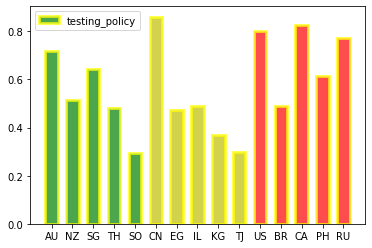

In [56]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y = [AU_testing_policy_average ,NZ_testing_policy_average ,SG_testing_policy_average ,TH_testing_policy_average ,SO_testing_policy_average ,
     CN_testing_policy_average ,EG_testing_policy_average ,IL_testing_policy_average ,KG_testing_policy_average ,TJ_testing_policy_average ,
     US_testing_policy_average ,BR_testing_policy_average ,CA_testing_policy_average ,PH_testing_policy_average ,RU_testing_policy_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='testing_policy', lw=3)
plt.legend(loc='upper left')
plt.show()

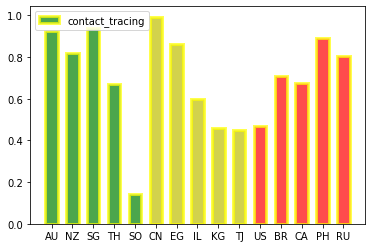

In [57]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y = [AU_contact_tracing_average ,NZ_contact_tracing_average ,SG_contact_tracing_average ,TH_contact_tracing_average ,SO_contact_tracing_average ,
     CN_contact_tracing_average ,EG_contact_tracing_average ,IL_contact_tracing_average ,KG_contact_tracing_average ,TJ_contact_tracing_average ,
     US_contact_tracing_average ,BR_contact_tracing_average ,CA_contact_tracing_average ,PH_contact_tracing_average ,RU_contact_tracing_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='contact_tracing', lw=3)
plt.legend(loc='upper left')
plt.show()

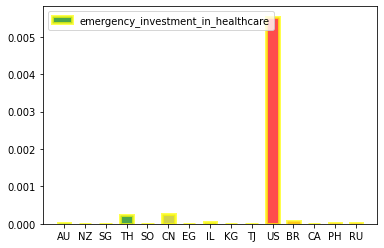

In [58]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y = [AU_emergency_investment_in_healthcare_average ,NZ_emergency_investment_in_healthcare_average ,SG_emergency_investment_in_healthcare_average ,TH_emergency_investment_in_healthcare_average ,SO_emergency_investment_in_healthcare_average ,
     CN_emergency_investment_in_healthcare_average ,EG_emergency_investment_in_healthcare_average ,IL_emergency_investment_in_healthcare_average ,KG_emergency_investment_in_healthcare_average ,TJ_emergency_investment_in_healthcare_average ,
     US_emergency_investment_in_healthcare_average ,BR_emergency_investment_in_healthcare_average ,CA_emergency_investment_in_healthcare_average ,PH_emergency_investment_in_healthcare_average ,RU_emergency_investment_in_healthcare_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='emergency_investment_in_healthcare', lw=3)
plt.legend(loc='upper left')
plt.show()

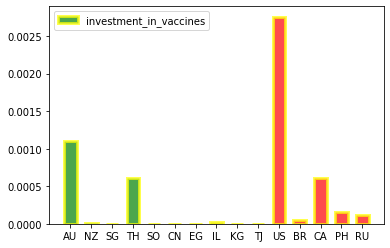

In [60]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y = [AU_investment_in_vaccines_average ,NZ_investment_in_vaccines_average ,SG_investment_in_vaccines_average ,TH_investment_in_vaccines_average ,SO_investment_in_vaccines_average ,
     CN_investment_in_vaccines_average ,EG_investment_in_vaccines_average ,IL_investment_in_vaccines_average ,KG_investment_in_vaccines_average ,TJ_investment_in_vaccines_average ,
     US_investment_in_vaccines_average ,BR_investment_in_vaccines_average ,CA_investment_in_vaccines_average ,PH_investment_in_vaccines_average ,RU_investment_in_vaccines_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='investment_in_vaccines', lw=3)
plt.legend(loc='upper left')
plt.show()

## From https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons, consider 1. Mortality Rate (per 100): Italy: 11.98, United Kingdom: 10.65, Mexico: 10.55, China: 5.24, Tajikistan: 0.78 Singapore: 0.05

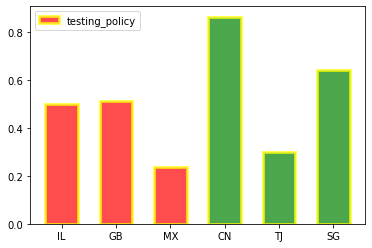

In [28]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [IL_testing_policy_average ,GB_testing_policy_average ,MX_testing_policy_average ,
     CN_testing_policy_average ,TJ_testing_policy_average ,SG_testing_policy_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='testing_policy', lw=3)
plt.legend(loc='upper left')
plt.show()

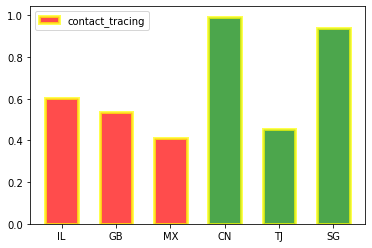

In [33]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [IL_contact_tracing_average ,GB_contact_tracing_average ,MX_contact_tracing_average ,
     CN_contact_tracing_average ,TJ_contact_tracing_average ,SG_contact_tracing_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='contact_tracing', lw=3)
plt.legend(loc='upper left')
plt.show()

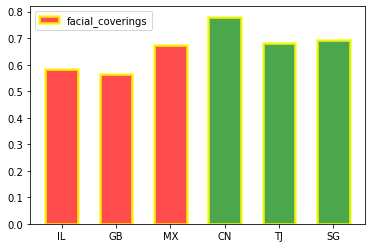

In [44]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [data_facial_coverings_IL_average ,data_facial_coverings_GB_average ,data_facial_coverings_MX_average ,
     data_facial_coverings_CN_average ,data_facial_coverings_TJ_average ,data_facial_coverings_SG_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='facial_coverings', lw=3)
plt.legend(loc='upper left')
plt.show()

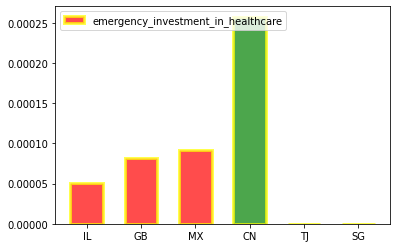

In [34]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [IL_emergency_investment_in_healthcare_average ,GB_emergency_investment_in_healthcare_average ,MX_emergency_investment_in_healthcare_average ,
     CN_emergency_investment_in_healthcare_average ,TJ_emergency_investment_in_healthcare_average ,SG_emergency_investment_in_healthcare_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='emergency_investment_in_healthcare', lw=3)
plt.legend(loc='upper left')
plt.show()


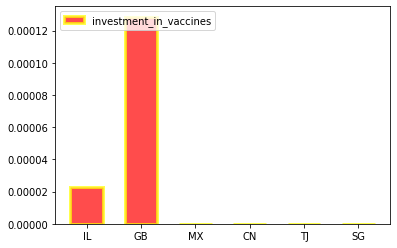

In [35]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [IL_investment_in_vaccines_average ,GB_investment_in_vaccines_average ,MX_investment_in_vaccines_average ,
     CN_investment_in_vaccines_average ,TJ_investment_in_vaccines_average ,SG_investment_in_vaccines_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='investment_in_vaccines', lw=3)
plt.legend(loc='upper left')
plt.show()


## From https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons, consider 2. Incident_Rate: Brazil: 2130.34, Kazakhstan: 571.25, Canada: 382.24, Egypt: 99.58, South Korea: 44.81, China: 6.43¶

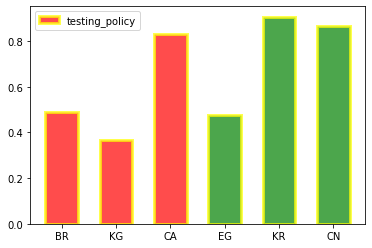

In [48]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [BR_testing_policy_average ,KG_testing_policy_average ,CA_testing_policy_average ,
     EG_testing_policy_average ,KR_testing_policy_average ,CN_testing_policy_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='testing_policy', lw=3)
plt.legend(loc='upper left')
plt.show()

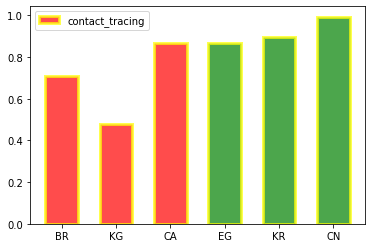

In [49]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [BR_contact_tracing_average ,KG_contact_tracing_average ,EG_contact_tracing_average ,
     EG_contact_tracing_average ,KR_contact_tracing_average ,CN_contact_tracing_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='contact_tracing', lw=3)
plt.legend(loc='upper left')
plt.show()

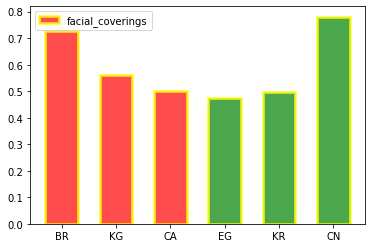

In [50]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [data_facial_coverings_BR_average ,data_facial_coverings_KG_average ,data_facial_coverings_CA_average ,
     data_facial_coverings_EG_average ,data_facial_coverings_KR_average ,data_facial_coverings_CN_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='facial_coverings', lw=3)
plt.legend(loc='upper left')
plt.show()

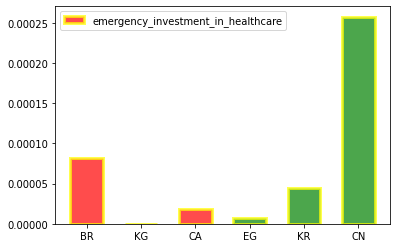

In [51]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [BR_emergency_investment_in_healthcare_average ,KG_emergency_investment_in_healthcare_average ,CA_emergency_investment_in_healthcare_average ,
     EG_emergency_investment_in_healthcare_average ,KR_emergency_investment_in_healthcare_average ,CN_emergency_investment_in_healthcare_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='emergency_investment_in_healthcare', lw=3)
plt.legend(loc='upper left')
plt.show()

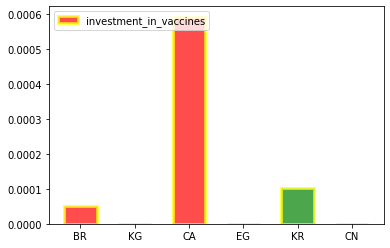

In [52]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [BR_investment_in_vaccines_average ,KG_investment_in_vaccines_average ,CA_investment_in_vaccines_average ,
     EG_investment_in_vaccines_average ,KR_investment_in_vaccines_average ,CN_investment_in_vaccines_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='investment_in_vaccines', lw=3)
plt.legend(loc='upper left')
plt.show()

# Last time, we found out that healthy policies are very important and here we analyze the sub-policies of healthy policy. And because of investment in healthycare and vaccines are long-term investments so we don't see much of their influences here (But I believe it will help at last). But all three other sub-policies like testing policy, contact tracing policy and mask policy are helpful to better performance towards Covid-19 based on our results above.

In [36]:
xls = pd.ExcelFile("https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/timeseries/OxCGRT_timeseries_all.xlsx")
data_facial_coverings = pd.read_excel(xls, 'h6_facial_coverings')

In [37]:
data_facial_coverings
# alpha-3 code

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,22Nov2020,23Nov2020,24Nov2020,25Nov2020,26Nov2020,27Nov2020,28Nov2020,29Nov2020,30Nov2020,01Dec2020
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,VUT,Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,YEM,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
179,ZAF,South Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
180,ZMB,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data_facial_coverings_AU = data_facial_coverings[data_facial_coverings['country_name'] == "Australia"]
data_facial_coverings_AU = data_facial_coverings_AU.drop(['country_code','country_name'],axis=1)
data_facial_coverings_AU_average = data_facial_coverings_AU.mean(axis=1)
data_facial_coverings_AU_average = data_facial_coverings_AU_average/(data_facial_coverings_AU.max(axis=1)-data_facial_coverings_AU.min(axis=1))
data_facial_coverings_AU_average = data_facial_coverings_AU_average.mean()
print(data_facial_coverings_AU_average)
data_facial_coverings_NZ = data_facial_coverings[data_facial_coverings['country_name'] == "New Zealand"]
data_facial_coverings_NZ = data_facial_coverings_NZ.drop(['country_code','country_name'],axis=1)
data_facial_coverings_NZ_average = data_facial_coverings_NZ.mean(axis=1)
data_facial_coverings_NZ_average = data_facial_coverings_NZ_average/(data_facial_coverings_NZ.max(axis=1)-data_facial_coverings_NZ.min(axis=1))
data_facial_coverings_NZ_average = data_facial_coverings_NZ_average.mean()
print(data_facial_coverings_NZ_average)
data_facial_coverings_SG = data_facial_coverings[data_facial_coverings['country_name'] == "Singapore"]
data_facial_coverings_SG = data_facial_coverings_SG.drop(['country_code','country_name'],axis=1)
data_facial_coverings_SG_average = data_facial_coverings_SG.mean(axis=1)
data_facial_coverings_SG_average = data_facial_coverings_SG_average/(data_facial_coverings_SG.max(axis=1)-data_facial_coverings_SG.min(axis=1))
data_facial_coverings_SG_average = data_facial_coverings_SG_average.mean()
print(data_facial_coverings_SG_average)
data_facial_coverings_TH = data_facial_coverings[data_facial_coverings['country_name'] == "Thailand"]
data_facial_coverings_TH = data_facial_coverings_TH.drop(['country_code','country_name'],axis=1)
data_facial_coverings_TH_average = data_facial_coverings_TH.mean(axis=1)
data_facial_coverings_TH_average = data_facial_coverings_TH_average/(data_facial_coverings_TH.max(axis=1)-data_facial_coverings_TH.min(axis=1))
data_facial_coverings_TH_average = data_facial_coverings_TH_average.mean()
print(data_facial_coverings_TH_average)
data_facial_coverings_SO = data_facial_coverings[data_facial_coverings['country_name'] == "Somalia"]
data_facial_coverings_SO = data_facial_coverings_SO.drop(['country_code','country_name'],axis=1)
data_facial_coverings_SO_average = data_facial_coverings_SO.mean(axis=1)
data_facial_coverings_SO_average = data_facial_coverings_SO_average/(data_facial_coverings_SO.max(axis=1)-data_facial_coverings_SO.min(axis=1))
data_facial_coverings_SO_average = data_facial_coverings_SO_average.mean()
print(data_facial_coverings_SO_average)

data_facial_coverings_CN = data_facial_coverings[data_facial_coverings['country_name'] == "China"]
data_facial_coverings_CN = data_facial_coverings_CN.drop(['country_code','country_name'],axis=1)
data_facial_coverings_CN_average = data_facial_coverings_CN.mean(axis=1)
data_facial_coverings_CN_average = data_facial_coverings_CN_average/(data_facial_coverings_CN.max(axis=1)-data_facial_coverings_CN.min(axis=1))
data_facial_coverings_CN_average = data_facial_coverings_CN_average.mean()
print(data_facial_coverings_CN_average)
data_facial_coverings_EG = data_facial_coverings[data_facial_coverings['country_name'] == "Egypt"]
data_facial_coverings_EG = data_facial_coverings_EG.drop(['country_code','country_name'],axis=1)
data_facial_coverings_EG_average = data_facial_coverings_EG.mean(axis=1)
data_facial_coverings_EG_average = data_facial_coverings_EG_average/(data_facial_coverings_EG.max(axis=1)-data_facial_coverings_EG.min(axis=1))
data_facial_coverings_EG_average = data_facial_coverings_EG_average.mean()
print(data_facial_coverings_EG_average)
data_facial_coverings_IL = data_facial_coverings[data_facial_coverings['country_name'] == "Israel"]
data_facial_coverings_IL = data_facial_coverings_IL.drop(['country_code','country_name'],axis=1)
data_facial_coverings_IL_average = data_facial_coverings_IL.mean(axis=1)
data_facial_coverings_IL_average = data_facial_coverings_IL_average/(data_facial_coverings_IL.max(axis=1)-data_facial_coverings_IL.min(axis=1))
data_facial_coverings_IL_average = data_facial_coverings_IL_average.mean()
print(data_facial_coverings_IL_average)
data_facial_coverings_KG = data_facial_coverings[data_facial_coverings['country_name'] == "Kyrgyz Republic"]
data_facial_coverings_KG = data_facial_coverings_KG.drop(['country_code','country_name'],axis=1)
data_facial_coverings_KG_average = data_facial_coverings_KG.mean(axis=1)
data_facial_coverings_KG_average = data_facial_coverings_KG_average/(data_facial_coverings_KG.max(axis=1)-data_facial_coverings_KG.min(axis=1))
data_facial_coverings_KG_average = data_facial_coverings_KG_average.mean()
print(data_facial_coverings_KG_average)
data_facial_coverings_TJ = data_facial_coverings[data_facial_coverings['country_name'] == "Tajikistan"]
data_facial_coverings_TJ = data_facial_coverings_TJ.drop(['country_code','country_name'],axis=1)
data_facial_coverings_TJ_average = data_facial_coverings_TJ.mean(axis=1)
data_facial_coverings_TJ_average = data_facial_coverings_TJ_average/(data_facial_coverings_TJ.max(axis=1)-data_facial_coverings_TJ.min(axis=1))
data_facial_coverings_TJ_average = data_facial_coverings_TJ_average.mean()
print(data_facial_coverings_TJ_average)

data_facial_coverings_US = data_facial_coverings[data_facial_coverings['country_name'] == "United States"]
data_facial_coverings_US = data_facial_coverings_US.drop(['country_code','country_name'],axis=1)
data_facial_coverings_US_average = data_facial_coverings_US.mean(axis=1)
data_facial_coverings_US_average = data_facial_coverings_US_average/(data_facial_coverings_US.max(axis=1)-data_facial_coverings_US.min(axis=1))
data_facial_coverings_US_average = data_facial_coverings_US_average.mean()
print(data_facial_coverings_US_average)
data_facial_coverings_BR = data_facial_coverings[data_facial_coverings['country_name'] == "Brazil"]
data_facial_coverings_BR = data_facial_coverings_BR.drop(['country_code','country_name'],axis=1)
data_facial_coverings_BR_average = data_facial_coverings_BR.mean(axis=1)
data_facial_coverings_BR_average = data_facial_coverings_BR_average/(data_facial_coverings_BR.max(axis=1)-data_facial_coverings_BR.min(axis=1))
data_facial_coverings_BR_average = data_facial_coverings_BR_average.mean()
print(data_facial_coverings_BR_average)
data_facial_coverings_CA = data_facial_coverings[data_facial_coverings['country_name'] == "Canada"]
data_facial_coverings_CA = data_facial_coverings_CA.drop(['country_code','country_name'],axis=1)
data_facial_coverings_CA_average = data_facial_coverings_CA.mean(axis=1)
data_facial_coverings_CA_average = data_facial_coverings_CA_average/(data_facial_coverings_CA.max(axis=1)-data_facial_coverings_CA.min(axis=1))
data_facial_coverings_CA_average = data_facial_coverings_CA_average.mean()
print(data_facial_coverings_CA_average)
data_facial_coverings_PH = data_facial_coverings[data_facial_coverings['country_name'] == "Philippines"]
data_facial_coverings_PH = data_facial_coverings_PH.drop(['country_code','country_name'],axis=1)
data_facial_coverings_PH_average = data_facial_coverings_PH.mean(axis=1)
data_facial_coverings_PH_average = data_facial_coverings_PH_average/(data_facial_coverings_PH.max(axis=1)-data_facial_coverings_PH.min(axis=1))
data_facial_coverings_PH_average = data_facial_coverings_PH_average.mean()
print(data_facial_coverings_PH_average)
data_facial_coverings_RU = data_facial_coverings[data_facial_coverings['country_name'] == "Russia"]
data_facial_coverings_RU = data_facial_coverings_RU.drop(['country_code','country_name'],axis=1)
data_facial_coverings_RU_average = data_facial_coverings_RU.mean(axis=1)
data_facial_coverings_RU_average = data_facial_coverings_RU_average/(data_facial_coverings_RU.max(axis=1)-data_facial_coverings_RU.min(axis=1))
data_facial_coverings_RU_average = data_facial_coverings_RU_average.mean()
print(data_facial_coverings_RU_average)
data_facial_coverings_MX = data_facial_coverings[data_facial_coverings['country_name'] == "Mexico"]
data_facial_coverings_MX = data_facial_coverings_MX.drop(['country_code','country_name'],axis=1)
data_facial_coverings_MX_average = data_facial_coverings_MX.mean(axis=1)
data_facial_coverings_MX_average = data_facial_coverings_MX_average/(data_facial_coverings_MX.max(axis=1)-data_facial_coverings_MX.min(axis=1))
data_facial_coverings_MX_average = data_facial_coverings_MX_average.mean()
print(data_facial_coverings_MX_average)
data_facial_coverings_GB = data_facial_coverings[data_facial_coverings['country_name'] == "United Kingdom"]
data_facial_coverings_GB = data_facial_coverings_GB.drop(['country_code','country_name'],axis=1)
data_facial_coverings_GB_average = data_facial_coverings_GB.mean(axis=1)
data_facial_coverings_GB_average = data_facial_coverings_GB_average/(data_facial_coverings_GB.max(axis=1)-data_facial_coverings_GB.min(axis=1))
data_facial_coverings_GB_average = data_facial_coverings_GB_average.mean()
print(data_facial_coverings_GB_average)
data_facial_coverings_KR = data_facial_coverings[data_facial_coverings['country_name'] == "South Korea"]
data_facial_coverings_KR = data_facial_coverings_KR.drop(['country_code','country_name'],axis=1)
data_facial_coverings_KR_average = data_facial_coverings_KR.mean(axis=1)
data_facial_coverings_KR_average = data_facial_coverings_KR_average/(data_facial_coverings_KR.max(axis=1)-data_facial_coverings_KR.min(axis=1))
data_facial_coverings_KR_average = data_facial_coverings_KR_average.mean()
print(data_facial_coverings_KR_average)

0.3694029850746269
0.22238805970149253
0.6913109756097561
0.7095808383233533
0.1921921921921922
0.7807807807807808
0.47504990019960075
0.5835820895522388
0.5615615615615616
0.6826826826826826
0.6708955223880597
0.726984126984127
0.5024875621890547
0.38109756097560976
0.46567164179104475
0.6737804878048781
0.5656716417910448
0.4975124378109453


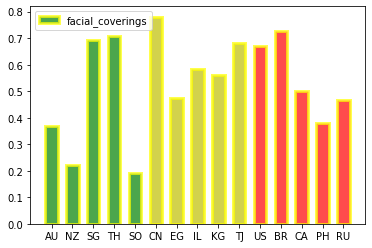

In [41]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y = [data_facial_coverings_AU_average, data_facial_coverings_NZ_average, data_facial_coverings_SG_average, data_facial_coverings_TH_average, data_facial_coverings_SO_average,
     data_facial_coverings_CN_average, data_facial_coverings_EG_average, data_facial_coverings_IL_average, data_facial_coverings_KG_average, data_facial_coverings_TJ_average, 
     data_facial_coverings_US_average, data_facial_coverings_BR_average, data_facial_coverings_CA_average, data_facial_coverings_PH_average, data_facial_coverings_RU_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='facial_coverings', lw=3)
plt.legend(loc='upper left')
plt.show()
